In [19]:
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
import networkx as nx
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.triads import triadic_census
import community
from community import community_louvain
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from dcss.plotting import format_axes_commas, custom_seaborn
custom_seaborn()
import os
import pydot
import igraph as ig
import leidenalg as la

Este código importa varias bibliotecas y módulos comúnmente utilizados para el análisis y visualización de datos en Python. Incluye bibliotecas como Pandas para manipulación de datos, NumPy para operaciones numéricas, Scikit-learn para aprendizaje automático, NetworkX para análisis de redes, Matplotlib y Seaborn para trazado y otras como Pydot, igraph y leidenalg. Estas bibliotecas permiten tareas como procesamiento de datos, agrupación en clústeres, detección de comunidades y análisis de redes en un entorno Jupyter Notebook.

In [20]:
contact_diaries = pd.read_csv("../data/Contact-diaries-network_data_2013.csv", sep = ' ')
G = nx.from_pandas_edgelist(contact_diaries, 'i', 'j', create_using=nx.Graph)
G.name = 'Reported Contacts(Diary Data)'
print(G)
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values())/len(G.nodes))

Graph named 'Reported Contacts(Diary Data)' with 120 nodes and 348 edges
Number of nodes 120
Number of edges 348
Average degree 5.8


Se lee un conjunto de datos de un diario de dataset de un archivo CSV usando Pandas y luego se crea un gráfico **_G_** usando NetworkX desde Pandas DataFrame contact_diaries. El gráfico representa los contactos informados con los nodos 'i' y 'j'. Luego, el código imprime el gráfico, el número de nodos, el número de aristas y el grado promedio del gráfico según los datos del diario de contactos.

In [21]:
contact_diaries.j.unique()[:5]

array([ 28, 106, 147, 177, 295])

Esta línea recupera los valores únicos presentes en la columna 'j' del marco de datos contact_diaries, que representa los nodos del gráfico y muestra los primeros cinco valores únicos en la columna 'j'.

In [22]:
gn_50 = nx.gn_graph(50, seed = 42)
sim_50 = pd.Series(triadic_census(gn_50))
sim_50

003     17464
012      1920
102         0
021D        0
021U      184
021C       32
111D        0
111U        0
030T        0
030C        0
201         0
120D        0
120U        0
120C        0
210         0
300         0
dtype: int64

Se genera un gráfico de Girvan-Newman con 50 nodos utilizando NetworkX con un valor inicial específico de 42. El censo triádico del gráfico **gn_50** se calcula utilizando la función _triadic_census_ y los resultados se almacenan en un **_sim_50_** de la serie Pandas, que proporciona información sobre la distribución de tríadas en el gráfico.

In [23]:
gn = nx.gn_graph(20, seed = 42)
gn.name = "Simulated DiGraph with 20 nodes"
def describe_simulated_network(network):
    print(f'Network: {network.name}')
    print(f'Number of nodes: {network.number_of_nodes()}')
    print(f'Number of edges: {network.number_of_edges()}')
    print(f'Density: {nx.density(network)}')
describe_simulated_network(gn)

Network: Simulated DiGraph with 20 nodes
Number of nodes: 20
Number of edges: 19
Density: 0.05


Se crea un gráfico de Girvan-Newman **gn** con 20 nodos utilizando NetworkX con un valor inicial especificado de 42. La función _describe_simulated_network_ está definida para proporcionar información sobre la red simulada, incluido su nombre, el número de nodos , el número de aristas y la densidad del gráfico. Luego se llama a la función con el gráfico de Girvan-Newman _gn_ generado como argumento para mostrar las características de la red.

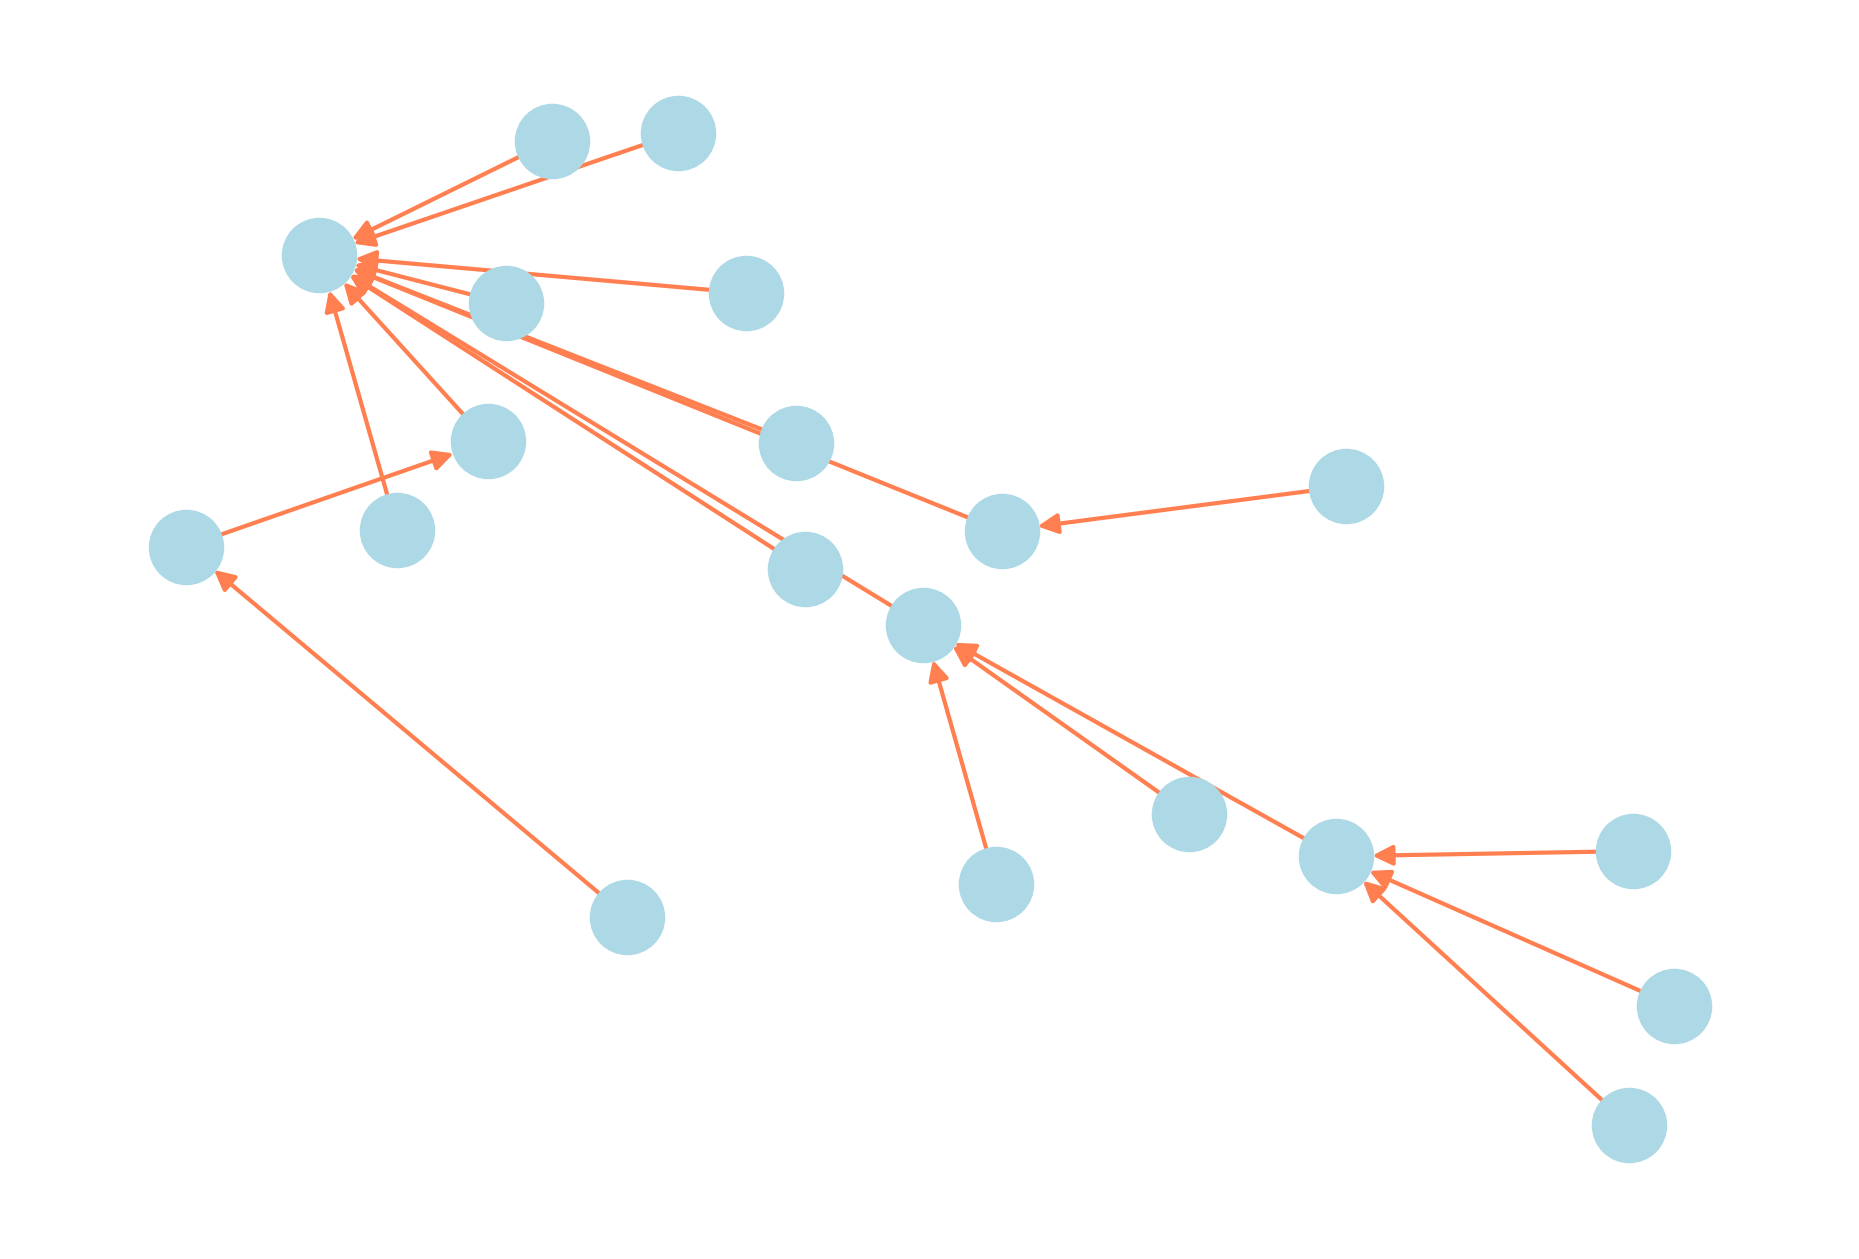

In [24]:
layout = nx.fruchterman_reingold_layout(gn, seed=12)
nx.draw(gn, layout, node_color='lightblue', edge_color='coral', node_size=300, width=1)
plt.show()

Este código genera un diseño de Fruchterman-Reingold para el gráfico **gn** de Girvan-Newman creado anteriormente, con un valor inicial especificado de 12. El gráfico se visualiza utilizando la función _nx.draw_ de NetworkX, especificando parámetros como el color del nodo y el color del borde, tamaño del nodo y ancho. Por el último, la trama del gráfico se muestra usando _plt.show()_.

In [25]:
sim_20_a = pd.Series(triadic_census(gn))
sim_20_a

003     858
012     222
102       0
021D      0
021U     51
021C      9
111D      0
111U      0
030T      0
030C      0
201       0
120D      0
120U      0
120C      0
210       0
300       0
dtype: int64

El censo triádico del gráfico de Girvan-Newman **gn** con 20 nodos se calcula utilizando la función _triadic_census_ y los resultados se almacenan en una serie Pandas _sim_20_a_. La serie _sim_20_a_ proporciona información sobre la distribución de tríadas en el gráfico.

In [26]:
gn.add_node("an isolate")
describe_simulated_network(gn)

Network: Simulated DiGraph with 20 nodes
Number of nodes: 21
Number of edges: 19
Density: 0.04523809523809524


Se agrega un nuevo nodo denominado "un aislado" al gráfico de Girvan-Newman **gn**. Luego se llama a la función _describe_simulated_network_ para mostrar información sobre el gráfico actualizado, incluido el número de nodos, aristas y densidad, lo que refleja la adición del nuevo nodo aislado.

In [27]:
sim_20_b = pd.Series(triadic_census(gn))
sim_20_b

003     1029
012      241
102        0
021D       0
021U      51
021C       9
111D       0
111U       0
030T       0
030C       0
201        0
120D       0
120U       0
120C       0
210        0
300        0
dtype: int64

Mismo código que para _sim_20_a_.

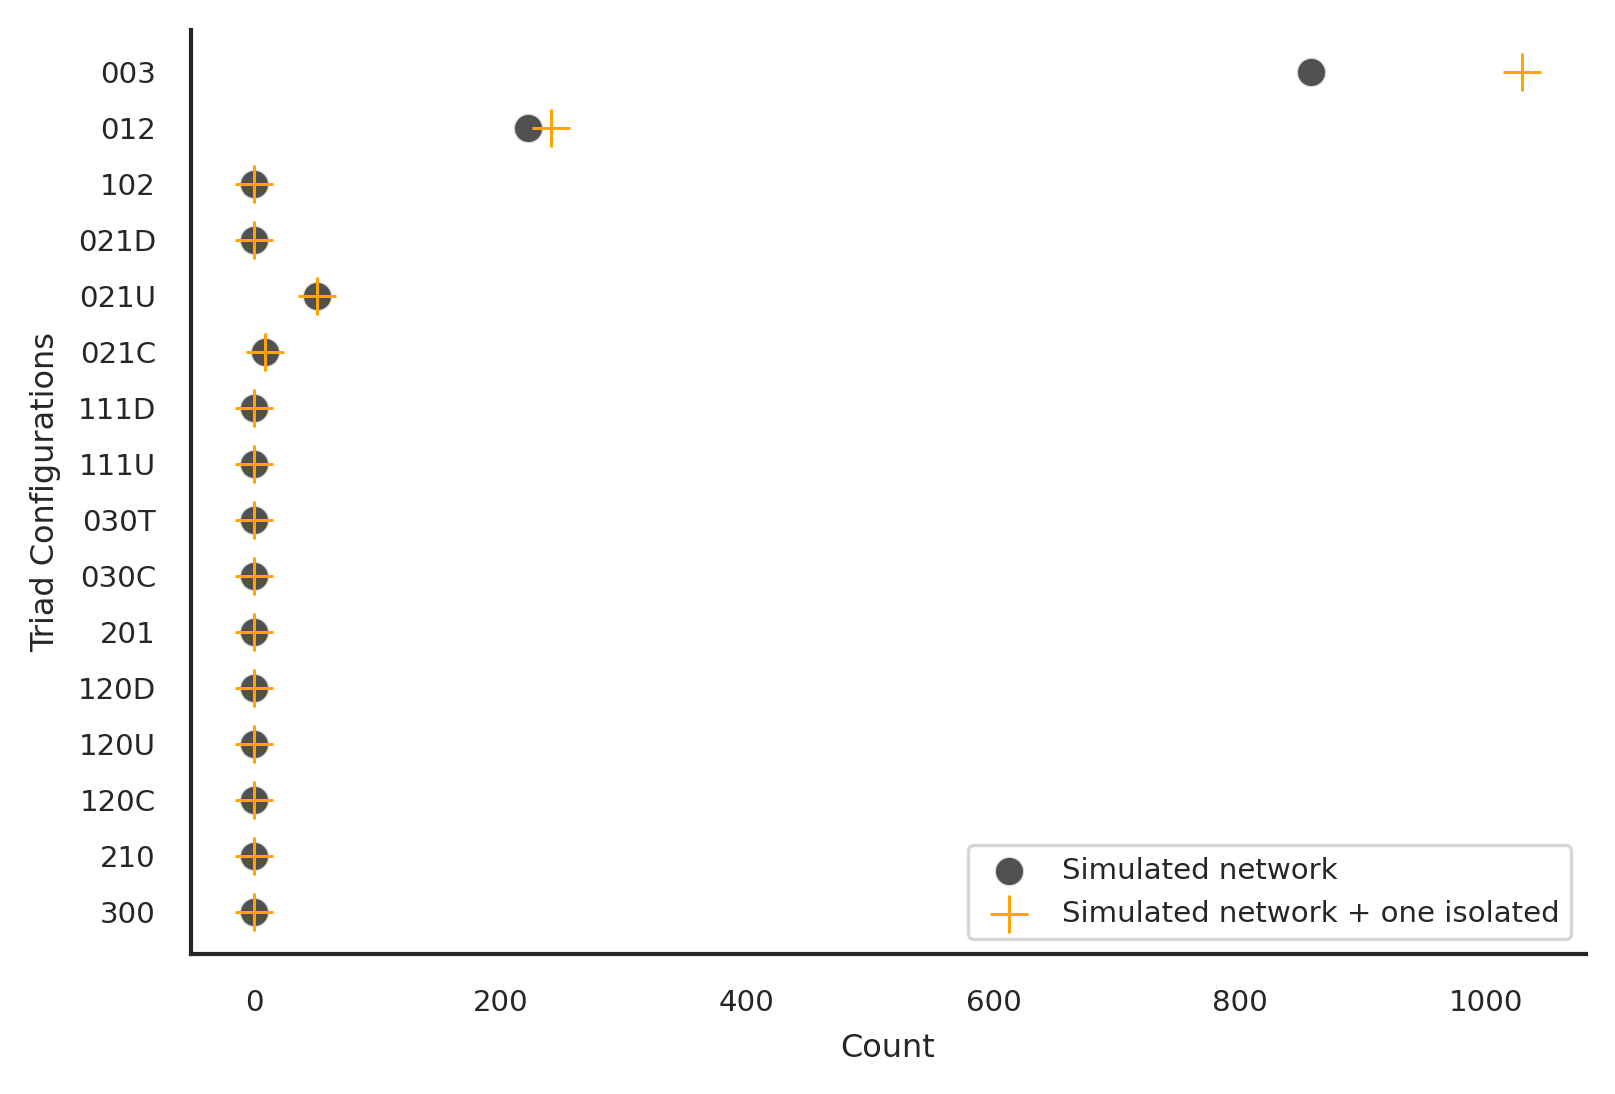

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(x=sim_20_a, y=sim_20_a.index, s=50, alpha=.8, label="Simulated network")
sns.scatterplot(x=sim_20_b, y=sim_20_b.index, color='orange', marker="+", s=80, label="Simulated network + one isolated")
ax.set(xlabel='Count', ylabel='Triad Configurations')
sns.despine()
plt.legend()
plt.show()

Se crea un diagrama de dispersión utilizando Seaborn para comparar los resultados del censo triádico (_sim_20_a_ y _sim_20_b_) del gráfico de Girvan-Newman antes y después de agregar el nodo aislado. El diagrama de dispersión visualiza el recuento de diferentes configuraciones de tríada en el eje y y las frecuencias correspondientes en el eje x para ambos escenarios. El gráfico incluye etiquetas para la red simulada y la red simulada con un nodo aislado, lo que permite una comparación visual de las estructuras triádicas.

In [29]:
clustered_g = nx.null_graph(create_using=nx.DiGraph())
nodes = range(0, 20)
for node in nodes:
    clustered_g.add_node(str(node))
for i in range(0,9):
    for j in range(0,9):
        if i!= j:
            clustered_g.add_edge(str(i), str(j))
clustered_g.name = 'Simulated DiGraph, Clustered'
describe_simulated_network(clustered_g)

Network: Simulated DiGraph, Clustered
Number of nodes: 20
Number of edges: 72
Density: 0.18947368421052632


Se crea un gráfico dirigido agrupado _clustered_g_ utilizando NetworkX. El gráfico consta de 20 nodos etiquetados del 0 al 19, con bordes que conectan los nodos en el rango [0, 9]. Luego se llama a la función _describe_simulated_network_ para mostrar información sobre el gráfico dirigido agrupado simulado, incluido su nombre, el número de nodos, el número de bordes y la densidad del gráfico.

In [30]:
not_clustered_g = nx.null_graph(create_using=nx.DiGraph())
for node in nodes:
    not_clustered_g.add_node(str(node))
for i in range(0, 72):
    random_from = str(random.randint(0, 19))
    random_to = str(random.randint(0, 19))
    while not_clustered_g.has_edge(random_from, random_to):
        random_from = str(random.randint(0, 19))
        random_to = str(random.randint(0, 19))
    not_clustered_g.add_edge(random_from, random_to)
not_clustered_g.name = 'Simulated DiGraph, Not Clustered'
describe_simulated_network(not_clustered_g)

Network: Simulated DiGraph, Not Clustered
Number of nodes: 20
Number of edges: 72
Density: 0.18947368421052632


Se crea un gráfico dirigido no agrupado _not_clustered_g utilizando NetworkX. El gráfico consta de 20 nodos etiquetados del 0 al 19, con bordes aleatorios agregados entre los nodos. El número de aristas aleatorias agregadas es 72, lo que garantiza que no se creen aristas duplicadas. Luego se llama a la función _describe_simulated_network_ para mostrar información sobre el gráfico dirigido no agrupado simulado, incluido su nombre, el número de nodos, el número de bordes y la densidad del gráfico.

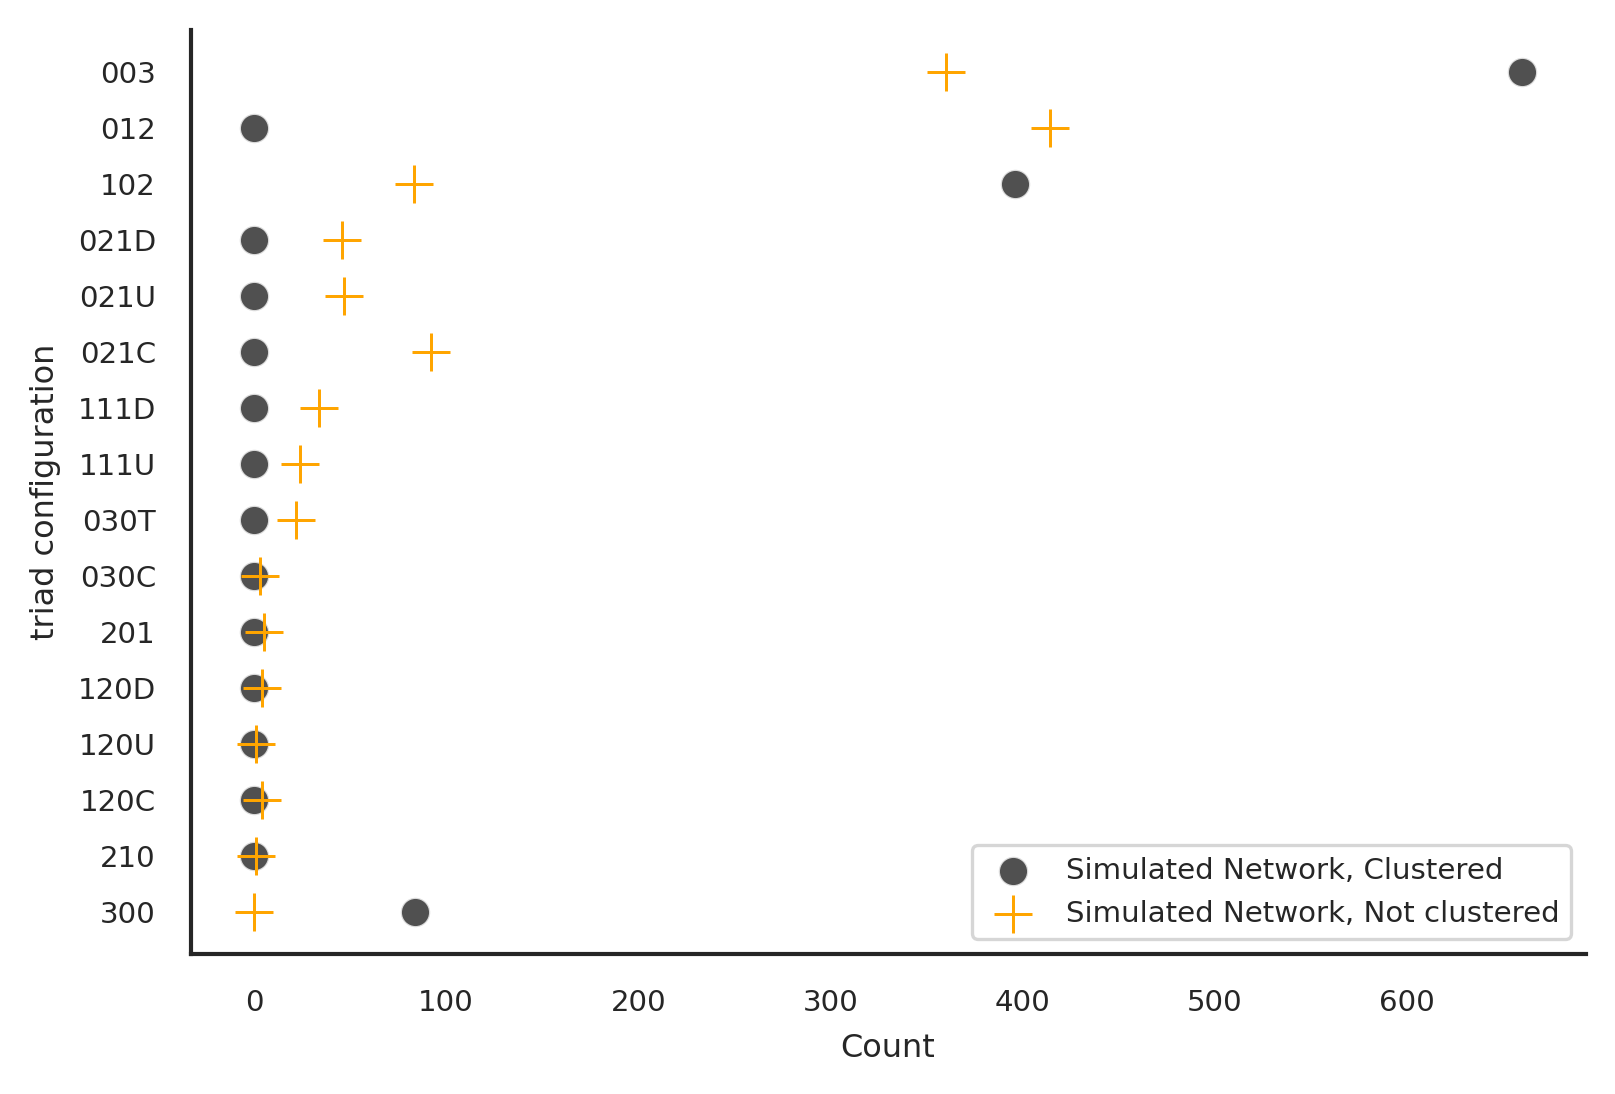

In [31]:
tc_clustered = pd.Series(triadic_census(clustered_g))
tc_not_clustered = pd.Series(triadic_census(not_clustered_g))
fig, ax =plt.subplots()
sns.scatterplot(x=tc_clustered, y=tc_clustered.index, s=50, alpha=.8, label="Simulated Network, Clustered")
sns.scatterplot(x=tc_not_clustered, y=tc_not_clustered.index, color="orange", marker="+", s=80, label="Simulated Network, Not clustered")
ax.set(xlabel='Count', ylabel='triad configuration')
sns.despine()
plt.legend()
plt.show()
fig.savefig("grafico1.png")

Los resultados del censo triádico para el gráfico agrupado _clustered_g_ y el gráfico no agrupado _not_clustered_g_ se calculan utilizando la función _triadic_census_ y se almacenan en las series Pandas _tc_clustered_ y _tc_not_clustered_, respectivamente. Luego se crea un diagrama de dispersión utilizando Seaborn para comparar los resultados del censo triádico de los dos gráficos, visualizando el recuento de diferentes configuraciones de tríadas. El gráfico muestra las configuraciones de tríada en el eje y y sus frecuencias en el eje x para las redes agrupadas y no agrupadas, lo que permite una comparación de sus estructuras triádicas. El gráfico se guarda como "grafico1.png".

In [32]:
k = 5
css = list(k_clique_communities(G, k))
print(f'Identified {len(css)} {k}-clique communities.')

Identified 6 5-clique communities.


La función _k_clique_communities_ de NetworkX se utiliza para identificar comunidades _k-clique_ en el gráfico **G** con un valor específico de k=5. Las comunidades _k-clique_ identificadas se almacenan en la lista **css** y el código imprime el número de comunidades encontradas con el valor especificado de k.

In [33]:
communities = [list(c) for c in css]
for c in communities:
    print(c)

[480, 771, 21, 791, 15]
[771, 21, 200, 826, 15]
[1828, 1412, 1295, 1201, 1594, 1214]
[232, 488, 210, 120, 89, 285]
[471, 681, 970, 475, 124]
[400, 145, 945, 489, 428]


Este código convierte las comunidades k-clique identificadas **css** en una lista de listas **comunidades** para facilitar su manejo. Luego recorre cada comunidad en la lista **comunidades** e imprime los nodos que pertenecen a cada comunidad k-clique identificada.

In [34]:
kcss = {}
for node in G.nodes():
    kcliques = [communities.index(c) for c in communities if node in list(c)]
    kcss[node] = kcliques

Se crea un diccionario **kcss** para asignar cada nodo en el gráfico **G** a los índices de las comunidades k-clique a las que pertenece. Para cada nodo en el gráfico, el código recorre en iteración la lista de comunidades identificadas **comunidades** y verifica si el nodo está presente en cada comunidad. Si el nodo se encuentra en una comunidad, el índice de esa comunidad se almacena en el diccionario **kcss** del nodo respectivo.

In [35]:
overlapping_nodes = []
in_any_kclique = []
for k, v in kcss.items():
    if len(v) > 1:
        overlapping_nodes.append(k)
    if len(v) >= 1:
        in_any_kclique.append(k)
print(f'{len(overlapping_nodes)} nodes belong to multiple $k$-clique communities: {overlapping_nodes}.')
print(f'{len(in_any_kclique)} nodes ({np.round(len(in_any_kclique)/len(G), 2)+100}% of the network) are embedded in at least on $k$-clique community.')

3 nodes belong to multiple $k$-clique communities: [15, 21, 771].
29 nodes (100.24% of the network) are embedded in at least on $k$-clique community.


El script identifica nodos que pertenecen a múltiples comunidades k-clique y nodos que están integrados en al menos una comunidad k-clique basándose en el diccionario kcss que asigna nodos a sus respectivas comunidades k-clique. Luego, el código imprime la cantidad de nodos que pertenecen a múltiples comunidades k-clique junto con sus ID de nodo, así como la cantidad total de nodos que están integrados en al menos una comunidad k-clique, expresado como un porcentaje del total de nodos en la red.